In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Data Processing

In [2]:
df = pd.read_csv('student_dropout/data.csv',sep = ';')
df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
#check data type
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [4]:
#check na
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
#check null
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
# scale continious values
continious_value = [column for column in df.columns if df[column].dtypes =='float64']
print(continious_value)
for i in continious_value:
    df[i] = df[i] - df[i].mean() / df[i].std()

['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [7]:
#The values in column 'Course' are high, create a new dict to improve stability in training process
course_dict = {course: i for i, course in enumerate(df['Course'].unique())}
df['Course'] = df['Course'].map(course_dict)

df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,111.944648,1,19,12,...,0,0,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
1,1,15,1,1,1,1,149.944648,1,1,3,...,0,6,6,6,11.703400,0,9.558112,-1.188132,0.789133,Graduate
2,1,1,5,2,1,1,111.944648,1,37,37,...,0,6,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
3,1,17,2,3,1,1,111.944648,1,38,37,...,0,6,10,5,10.436733,0,5.058112,-1.688132,-3.120867,Graduate
4,2,39,1,4,0,1,89.944648,1,37,38,...,0,6,6,6,11.036733,0,9.558112,-1.188132,0.789133,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,114.944648,1,1,1,...,0,6,8,5,10.703400,0,11.158112,1.911868,-4.060867,Graduate
4420,1,1,2,3,1,1,109.944648,105,1,1,...,0,6,6,2,9.036733,0,6.758112,-0.288132,2.019133,Dropout
4421,1,1,1,6,1,1,143.944648,1,37,37,...,0,8,9,1,11.536733,0,9.558112,-1.188132,0.789133,Dropout
4422,1,1,1,13,1,1,169.944648,1,37,37,...,0,5,6,5,10.036733,0,5.058112,-1.688132,-3.120867,Graduate


In [8]:
df2 = df.copy()
df3 = df.copy()

**Bài 1**:Sử dụng Numpy xây dựng phương pháp Logistic Regression và Gradient 
Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá 
trị của hàm loss trong toàn bộ quá trình huấn luyện.

In [9]:
def convert_target(target:str) -> int:
    if target == 'Graduate':
        return 0
    else:
        return 1

df['Target'] = df['Target'].apply(convert_target)

In [10]:
data = df.to_numpy()
data_train, data_dev, data_test = np.split(data,indices_or_sections=[int(0.8*len(data)),int(0.9*len(data))])
data_train.shape,data_dev.shape, data_test.shape


((3539, 37), (442, 37), (443, 37))

In [11]:
X_train = data_train[:,:-1]
y_train = data_train[:,-1].reshape(-1,1)
X_dev = data_dev[:,:-1]
y_dev = data_dev[:,-1].reshape(-1,1)
X_test = data_dev[:,:-1]
y_test = data_dev[:,-1].reshape(-1,1)

In [12]:
class MyLogisticRegression():
    def __init__(self, epoch, lr):
        self.epoch=epoch
        self.lr = lr
        self.w = None
        self.train_loss= []
        self.val_loss = []
        self.metrics = []
    
        
    def sigmoid(self,z):
        return 1/ (1+np.exp(-z) )   
    def loss_func(self,y,y_hat):
        return -(y*np.log(y_hat+1e-6)+(1-y)*np.log(1-y_hat+1e-6)).mean()
    def accuracy(self,y,y_hat):
        y_hat = np.where(y_hat>0.5,1,0)
        return (y_hat==y).mean()
    def predict(self,X):
        z = X @ self.w
        y_hat = self.sigmoid(z)
        return y_hat
    def fit(self,X_train,X_dev,y_train,y_dev):
        n = X_train.shape[0]
        d = X_train.shape[1]
        #weights initialization as a column vector of zeros
        self.w = np.zeros((d,1))
        for i in range(self.epoch):
            #foward pass
            y_hat = self.predict(X_train)
            #calculate accuracy
            acc = self.accuracy(y_train,y_hat)
            #train loss 
            loss = self.loss_func(y_train,y_hat)
            self.train_loss.append(loss)
            #val loss
            y_val_hat = self.predict(X_dev)
            val_loss = self.loss_func(y_dev,y_val_hat)
            self.val_loss.append(val_loss)
            #gradient
            distance = y_hat - y_train
            grad = (X_train.T @ distance)/n
            #weights update
            self.w -=  self.lr * grad
            
            self.metrics.append(acc)
            print(f'\nEPOCH {i + 1}:\tTraining loss: {loss:.3f}\tValidation loss: {val_loss:.3f}')
            

In [13]:
model = MyLogisticRegression(epoch=1000,lr=0.0001)

In [14]:
model.fit(X_train,X_dev,y_train,y_dev)



EPOCH 1:	Training loss: 0.693	Validation loss: 0.693

EPOCH 2:	Training loss: 0.692	Validation loss: 0.693

EPOCH 3:	Training loss: 0.691	Validation loss: 0.693

EPOCH 4:	Training loss: 0.690	Validation loss: 0.692

EPOCH 5:	Training loss: 0.689	Validation loss: 0.691

EPOCH 6:	Training loss: 0.689	Validation loss: 0.690

EPOCH 7:	Training loss: 0.688	Validation loss: 0.689

EPOCH 8:	Training loss: 0.687	Validation loss: 0.688

EPOCH 9:	Training loss: 0.686	Validation loss: 0.687

EPOCH 10:	Training loss: 0.685	Validation loss: 0.686

EPOCH 11:	Training loss: 0.685	Validation loss: 0.685

EPOCH 12:	Training loss: 0.684	Validation loss: 0.685

EPOCH 13:	Training loss: 0.683	Validation loss: 0.684

EPOCH 14:	Training loss: 0.682	Validation loss: 0.683

EPOCH 15:	Training loss: 0.681	Validation loss: 0.682

EPOCH 16:	Training loss: 0.681	Validation loss: 0.681

EPOCH 17:	Training loss: 0.680	Validation loss: 0.680

EPOCH 18:	Training loss: 0.679	Validation loss: 0.680

EPOCH 19:	Training

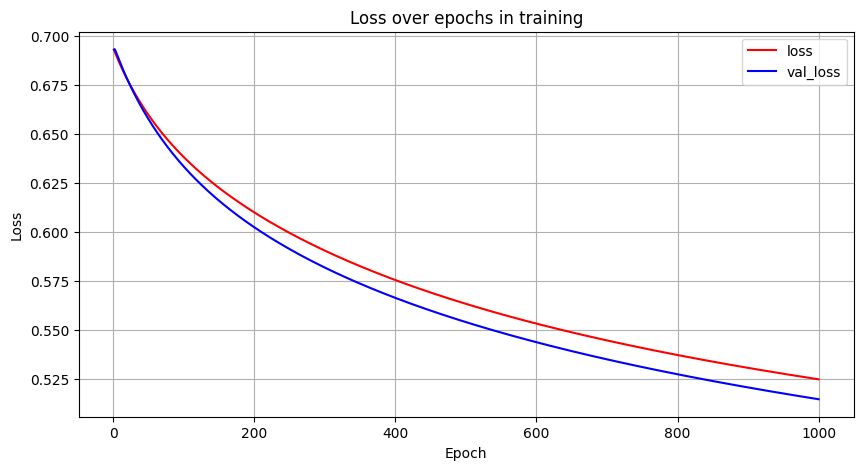

In [15]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1, model.epoch+1)), model.train_loss, color = 'red' , label = 'loss')
plt.plot(list(range(1, model.epoch+1)), model.val_loss, color = 'blue' , label = 'val_loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Loss over epochs in training')
plt.legend()
plt.grid()
plt.show()

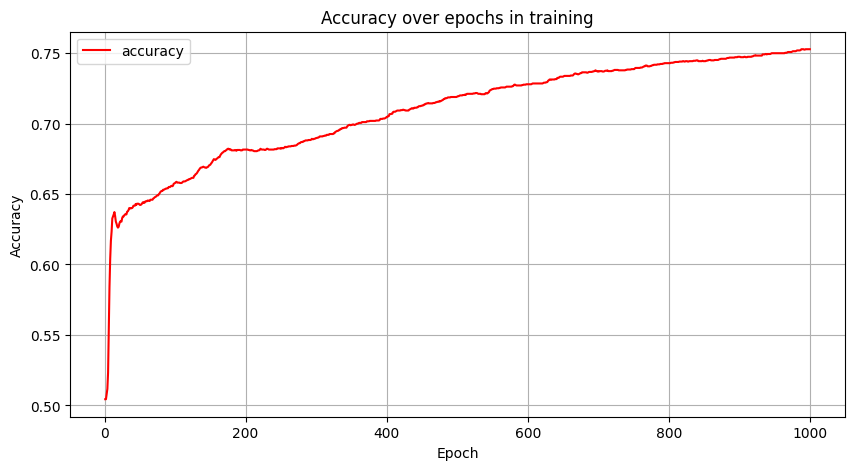

In [16]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1, model.epoch+1)), model.metrics, color = 'red' , label = 'accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs in training')
plt.legend()
plt.grid()
plt.show()

In [17]:
y_test_predict = model.predict(X_test)
test_accuracy = model.accuracy(y_test,y_test_predict)
print(test_accuracy)

0.753393665158371


**Bài 2**: Sử dụng Numpy xây dựng phương pháp Softmax Regression và Gradient 
Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá 
trị của hàm loss trong toàn bộ quá trình huấn luyện.

In [18]:
df2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,111.944648,1,19,12,...,0,0,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
1,1,15,1,1,1,1,149.944648,1,1,3,...,0,6,6,6,11.703400,0,9.558112,-1.188132,0.789133,Graduate
2,1,1,5,2,1,1,111.944648,1,37,37,...,0,6,0,0,-1.963267,0,6.458112,0.511868,1.739133,Dropout
3,1,17,2,3,1,1,111.944648,1,38,37,...,0,6,10,5,10.436733,0,5.058112,-1.688132,-3.120867,Graduate
4,2,39,1,4,0,1,89.944648,1,37,38,...,0,6,6,6,11.036733,0,9.558112,-1.188132,0.789133,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,114.944648,1,1,1,...,0,6,8,5,10.703400,0,11.158112,1.911868,-4.060867,Graduate
4420,1,1,2,3,1,1,109.944648,105,1,1,...,0,6,6,2,9.036733,0,6.758112,-0.288132,2.019133,Dropout
4421,1,1,1,6,1,1,143.944648,1,37,37,...,0,8,9,1,11.536733,0,9.558112,-1.188132,0.789133,Dropout
4422,1,1,1,13,1,1,169.944648,1,37,37,...,0,5,6,5,10.036733,0,5.058112,-1.688132,-3.120867,Graduate


In [19]:
df2 = pd.get_dummies(df2, columns=['Target']).astype(int)


In [20]:
data = df2.to_numpy()
data_train, data_dev, data_test = np.split(data,indices_or_sections=[int(0.8*len(data)),int(0.9*len(data))])
print(data_train.shape,data_dev.shape, data_test.shape)
X_train2 = data_train[:,:-3]
y_train2 = data_train[:,36:]
X_dev2 = data_dev[:,:-3]
y_dev2 = data_dev[:,36:]
X_test2 = data_dev[:,:-3]
y_test2 = data_dev[:,36:]
X_train2.shape,y_train2.shape


(3539, 39) (442, 39) (443, 39)


((3539, 36), (3539, 3))

In [21]:
class MySoftmaxRegression():
    def __init__(self,epoch, lr):
        self.epoch = epoch
        self.lr = lr
        self.w = None
        self.train_loss = []
        self.val_loss = []
        self.metrics = []
    def stable_softmax(self,z):
        z_max = np.max(z, axis = 1, keepdims=True)
        exp_z = np.exp(z - z_max)
        return exp_z / np.sum(exp_z, axis= 1, keepdims=True)
    def predict(self,X):
        z = X @ self.w
        y_hat = self.stable_softmax(z)
        return y_hat
    def accuracy(self,y,y_predict):
        max_y = np.max(y_predict,axis=1,keepdims=True)
        y_classify = np.where(y_predict==max_y,1,0)
        return (y==y_classify).mean()
    def loss_func(self,y,y_hat):
        return -((y*np.log(y_hat + 1e-6)).sum(axis= 1)).mean()
    def fit(self,X_train,X_dev,y_train,y_dev):
        n = X_train.shape[0]
        d = X_train.shape[1]
        self.w = np.zeros((d,y_train.shape[1]))
        for i in range(self.epoch):
            y_hat = self.predict(X_train)
            train_loss = self.loss_func(y_train,y_hat)

            y_dev_hat = self.predict(X_dev)
            val_loss = self.loss_func(y_dev,y_dev_hat)

            acc = self.accuracy(y_train,y_hat)

            grad = (X_train.T @ (y_hat-y_train)) / n
            self.w -= self.lr * grad
            self.train_loss.append(train_loss)
            self.val_loss.append(val_loss)
            self.metrics.append(acc)
            print(f'\nEPOCH {i + 1}:\tTraining loss: {train_loss:.3f}\tValidation loss: {val_loss:.3f}')
        

In [22]:
model2 = MySoftmaxRegression(1000,0.0001)
model2.fit(X_train2,X_dev2,y_train2,y_dev2)




EPOCH 1:	Training loss: 1.099	Validation loss: 1.099

EPOCH 2:	Training loss: 1.015	Validation loss: 1.040

EPOCH 3:	Training loss: 1.012	Validation loss: 1.028

EPOCH 4:	Training loss: 1.010	Validation loss: 1.027

EPOCH 5:	Training loss: 1.008	Validation loss: 1.025

EPOCH 6:	Training loss: 1.007	Validation loss: 1.023

EPOCH 7:	Training loss: 1.005	Validation loss: 1.021

EPOCH 8:	Training loss: 1.003	Validation loss: 1.019

EPOCH 9:	Training loss: 1.002	Validation loss: 1.018

EPOCH 10:	Training loss: 1.000	Validation loss: 1.016

EPOCH 11:	Training loss: 0.999	Validation loss: 1.014

EPOCH 12:	Training loss: 0.997	Validation loss: 1.012

EPOCH 13:	Training loss: 0.996	Validation loss: 1.011

EPOCH 14:	Training loss: 0.994	Validation loss: 1.009

EPOCH 15:	Training loss: 0.993	Validation loss: 1.007

EPOCH 16:	Training loss: 0.991	Validation loss: 1.006

EPOCH 17:	Training loss: 0.990	Validation loss: 1.004

EPOCH 18:	Training loss: 0.989	Validation loss: 1.003

EPOCH 19:	Training

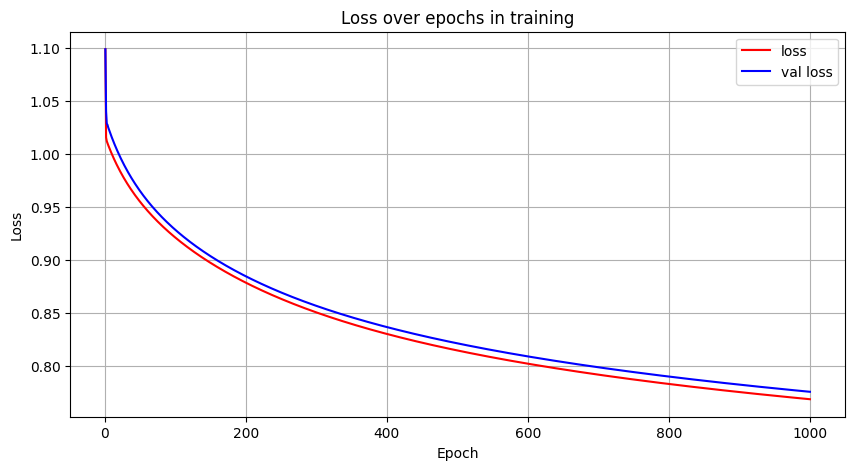

In [23]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1, model2.epoch+1)), model2.train_loss, color = 'red' , label = 'loss')
plt.plot(list(range(1, model2.epoch+1)), model2.val_loss, color = 'blue' , label = 'val loss')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Loss over epochs in training')
plt.legend()
plt.grid()
plt.show()

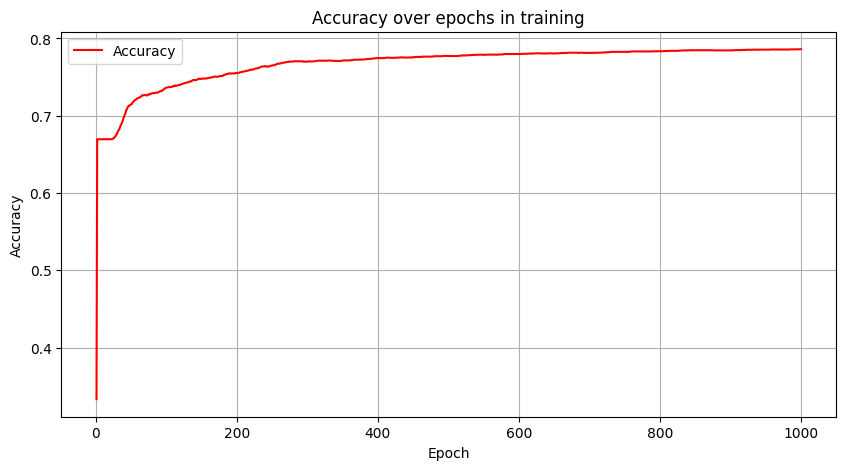

In [24]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1, model2.epoch+1)), model2.metrics, color = 'red' , label = 'Accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs in training')
plt.legend()
plt.grid()
plt.show()

**Bài 3**: Sử dụng các thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại 02 
phương pháp Logistic Regression và Softmax Regression.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train.reshape(-1))
y_predict = log_reg.predict(X_test)
acc = accuracy_score(y_test,y_predict)
print(acc)


0.8484162895927602


In [32]:
softmax_reg = LogisticRegression(multi_class='multinomial',max_iter=5000)
softmax_reg.fit(X_train2,y_train2.argmax(axis=1))
y_predict = softmax_reg.predict(X_test2)
acc = accuracy_score(y_test2.argmax(axis=1),y_predict)
print(acc)


d:\Anacoda\envs\AI_HCM\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.755656108597285
